# Visualizing GPS Data

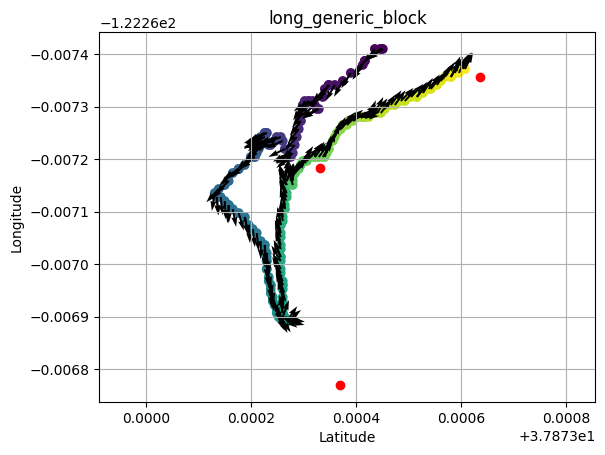

In [54]:
import numpy as np 
import matplotlib.pyplot as plt

# load data
BASE_DIR = "/home/lydia/data/frodobots/gps_test"
FOLDER_DIR = "long_generic_block"
coords = np.load(f"{BASE_DIR}/{FOLDER_DIR}/gps.npz")
coords = coords["gps"]

truth = None
truth = np.array([[37.87363614447846, -122.26735691672944], [37.873331492859975, -122.26718384785417] , [37.87337009967762, -122.26676988374533]])

# helper function 
def convert_angle_compass_to_cartesian(compass):
    return(((360 - compass) % 360) + 90) % 360

# Get Info
lat = coords[:, 0]
long = coords[:, 1]
dif = max(max(lat) - min(lat), max(long) - min(long))

rad_angles = np.radians([a for a in coords[:, 2]]) # generic gps already converted 
# rad_angles = np.radians([convert_angle_compass_to_cartesian(a) for a in coords[:, 2]]) # convert from compass setup to counterclockwise 
dx = np.cos(rad_angles)  # x-components of the vectors
dy = np.sin(rad_angles)  # y-components of the vectors

# PLOT
# Create the quiver plot
plt.scatter(lat, long, c=np.arange(len(lat)), cmap='viridis')
plt.quiver(lat, long, dx, dy, angles='xy', scale_units='xy', scale=15 / dif ) # max(max(lat) - min(lat), max(long) - min(long))

if truth is not None:
    plt.scatter(truth[:, 0], truth[:, 1], color = "red")

# Labels and show plot
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'{FOLDER_DIR}')
plt.axis("equal")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [22]:
np.radians()

In [25]:
convert_angle_compass_to_cartesian(180)

270

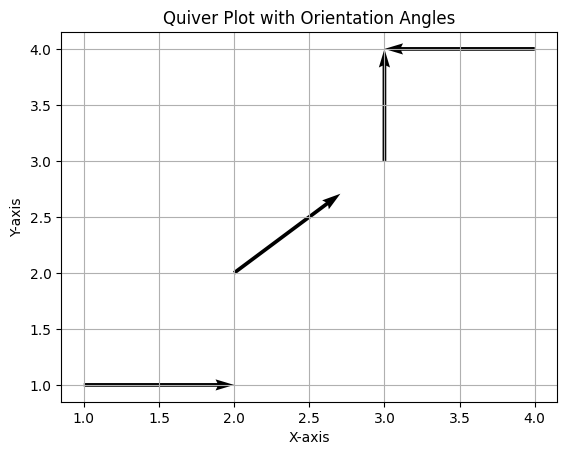

In [26]:
import matplotlib.pyplot as plt
import numpy as npfri   

# Example data
x = [1, 2, 3, 4]  # x-coordinates of points
y = [1, 2, 3, 4]  # y-coordinates of points
angles = [0, np.pi/4, np.pi/2, np.pi]  # Orientation angles in radians

# Convert angles to direction components
dx = np.cos(angles)  # x-components of the vectors
dy = np.sin(angles)  # y-components of the vectors

# Create the quiver plot
plt.figure()
plt.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1)

# Labels and show plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Quiver Plot with Orientation Angles')
plt.grid(True)
plt.show()
